### **1. Importation des librairies**

In [1]:
# Importation des librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Importation de l'extension data_table pour l'affichage optimisé des dataframes
#from google.colab import data_table


In [2]:
# Importation du module os pour interagir avec le système d'exploitation
import os
path = '../../../../images/image_train'

list_img = os.listdir(path)

print('le nombre total d\'image dans le repertoire image_train est de :', len(list_img))

## le nombre d'images correspond au nombre de ligne


le nombre total d'image dans le repertoire image_train est de : 84916


### **2. Fusion des datasets**

In [3]:
# Chargement des fichiers '="X_train_uptade.csv" et "Y_trainCVw08PX.csv"
X_train = pd.read_csv('../../../../X_train.csv', index_col=0)
y_train = pd.read_csv('../../../../y_train.csv', index_col=0)

# Fusion avec merge des deux datasets
df = pd.merge(X_train, y_train, left_index = True, right_index = True)

# Affichage des 5 premières lignes
display(df.head())

# Affichage des 5 dernières lignes
display(df.tail())

,designation,description,productid,imageid,prdtypecode
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,10
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,2280
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,50
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,1280
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,2705


,designation,description,productid,imageid,prdtypecode
84911,The Sims [ Import Anglais ],NaN,206719094,941495734,40
84912,Kit piscine acier NEVADA déco pierre Ø 3.50m x...,<b>Description complète :</b><br />Kit piscine...,3065095706,1188462883,2583
84913,Journal Officiel De La Republique Francaise N°...,NaN,440707564,1009325617,2280
84914,Table Basse Bois De Récupération Massif Base B...,<p>Cette table basse a un design unique et con...,3942400296,1267353403,1560
84915,Gomme De Collection 2 Gommes Pinguin Glace Ver...,NaN,57203227,684671297,2522


### **3. Ajout d'une colonne pour retrouver les images plus facilement**

In [4]:
# création d'une nouvelle colonne
df['Nom image'] = ['image_' + str(imageid) + '_product_' + str(productid) + '.jpg' for imageid, productid in zip(df['imageid'], df['productid'])]
df['lien'] = str(path) + '/' + df['Nom image']
display(df.head())

df.info()

,designation,description,productid,imageid,prdtypecode,Nom image,lien
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,10,image_1263597046_product_3804725264.jpg,../../../../images/image_train/image_126359704...
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,2280,image_1008141237_product_436067568.jpg,../../../../images/image_train/image_100814123...
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,50,image_938777978_product_201115110.jpg,../../../../images/image_train/image_938777978...
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,1280,image_457047496_product_50418756.jpg,../../../../images/image_train/image_457047496...
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,2705,image_1077757786_product_278535884.jpg,../../../../images/image_train/image_107775778...


<class 'pandas.core.frame.DataFrame'>
Index: 84916 entries, 0 to 84915
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  int64 
 3   imageid      84916 non-null  int64 
 4   prdtypecode  84916 non-null  int64 
 5   Nom image    84916 non-null  object
 6   lien         84916 non-null  object
dtypes: int64(3), object(4)
memory usage: 7.2+ MB


### **4. Preparation des images**

#### Pour l'amélioration du traitement image :

##### Redimensionnement des images : 
Assurez-vous que toutes les images ont une taille uniforme. Les modèles d'apprentissage profond fonctionnent souvent mieux avec des images de taille fixe.

##### Normalisation des pixels : 
Normalisez les valeurs des pixels pour les ramener dans une plage spécifique (par exemple, [0, 1] ou [-1, 1]). Cela peut aider le modèle à converger plus rapidement.

##### Augmentation des données : 
Utilisez des techniques d'augmentation de données pour générer des variations supplémentaires des images d'entraînement. Cela peut inclure des rotations, des retournements, des zooms, etc. L'augmentation des données peut améliorer la capacité du modèle à généraliser.

##### Suppression des bords noirs : 
Vous pourriez détecter ces bords noirs et les supprimer pour éviter qu'ils n'affectent la performance du modèle.

##### Conversion en niveaux de gris : 
Si la couleur n'est pas cruciale pour la classification, vous pourriez convertir les images en niveaux de gris pour réduire la complexité du modèle.

##### Utilisation de modèles pré-entrainés : 
Vous pourriez exploiter des modèles de réseau neuronal pré-entrainés sur de grandes bases de données (comme ImageNet) pour extraire des caractéristiques des images avant de les alimenter à votre modèle de classification.

##### Élimination du bruit : 
Appliquez des filtres pour réduire le bruit dans les images, ce qui peut améliorer la qualité des caractéristiques extraites par le modèle.

##### Segmentation d'images : 
Si vous avez des informations spécifiques dans les images que vous souhaitez isoler (par exemple, séparer un produit d'un arrière-plan), vous pourriez explorer des techniques de segmentation d'images.

##### Utilisation de techniques avancées : 
Selon les spécificités de votre problème, vous pourriez également envisager des techniques plus avancées telles que le transfert de style, la génération d'images adversaires (GAN), etc.

*** Tester ces améliorations sur un petit sous-ensemble des données pour évaluer leur impact sur la qualité des images et la performance du modèle.***

-------------------------------------------------
On commence par checker si toutes les images ont la même dimension

In [5]:
from PIL import Image

# Fonction pour obtenir la taille d'une image
def obtenir_taille_image(path):
    image = Image.open(path)
    return image.size

# Appliquer la fonction pour obtenir les tailles des images
df['taille_image'] = df['lien'].apply(lambda x: obtenir_taille_image(x))

# Afficher les tailles uniques des images
tailles_uniques = df['taille_image'].unique()
print("Tailles uniques des images :", tailles_uniques)

# Vérifier s'il y a plus d'une taille unique
if len(tailles_uniques) > 1:
    print("Les images n'ont pas toutes la même taille.")
else:
    print("Toutes les images ont la même taille.")


Tailles uniques des images : [(500, 500)]
Toutes les images ont la même taille.


------------------------
Conversion des images en noir et blanc

In [6]:
# Fonction pour convertir une image en niveaux de gris
def convertir_en_niveaux_de_gris(path):
    image = Image.open(path).convert("L")
    return image

# Appliquer la fonction pour convertir les images
df['image_niveaux_de_gris'] = df['lien'].apply(lambda x: convertir_en_niveaux_de_gris(x))

# Sauvegarder le DataFrame avec les images en niveaux de gris
# df.to_csv("dataframe_avec_imagegris.csv", index=False)

In [10]:
#Si l'on veut sauvegarder les images grises dans un dossier

# Créer un dossier pour sauvegarder les images en niveaux de gris
dossier_destination = "../../../../images/niveaux_de_gris"
os.makedirs(dossier_destination, exist_ok=True)

# Sauvegarder les images en niveaux de gris dans le dossier
for index, row in df.iterrows():
    nom_image = row['Nom image']
    chemin_destination = os.path.join(dossier_destination, f"{nom_image}.jpg")
    row['image_niveaux_de_gris'].save(chemin_destination)


--------------------------------------
Elimination du bruit

In [7]:
from PIL import ImageFilter

# Fonction pour appliquer un filtre de lissage Gaussien à une image
def appliquer_filtre_lissage(image):
    image_filtree = image.filter(ImageFilter.GaussianBlur(radius=2)) # lissage gaussien avec un rayon de flou de 2
    return image_filtree

# Appliquation sur le dataframe
df['image_filtree'] = df['image_niveaux_de_gris'].apply(lambda x: appliquer_filtre_lissage(x))

# Sauvegarder le DataFrame avec les images filtrées
# df.to_csv("dataframe_avec_imagegris_sansbruit.csv", index=False)


In [12]:
# Créer un dossier pour sauvegarder les images filtrées
dossier_destination_filtre = "../../../../images/niveaux_de_gris_filtree"
os.makedirs(dossier_destination_filtre, exist_ok=True)

# Sauvegarder les images filtrées dans le dossier
for index, row in df.iterrows():
    nom_image = row['Nom image']
    chemin_destination_filtre = os.path.join(dossier_destination_filtre, f"{nom_image}.jpg")
    row['image_filtree'].save(chemin_destination_filtre)


-------
Augmentation du nombre d'images

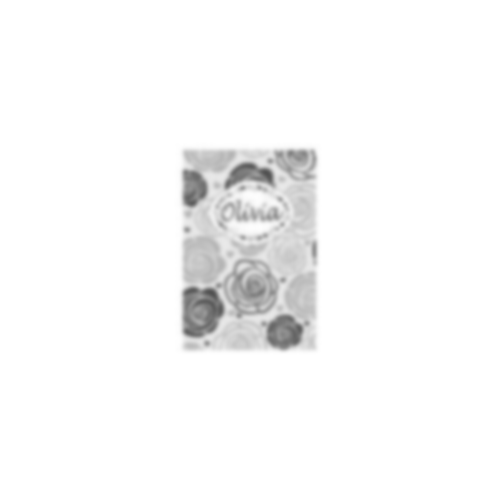

In [8]:
df.drop('image_niveaux_de_gris', axis=1)
df['image_filtree'].iloc[0]

In [11]:
import numpy as np
import random

# Fonction pour effectuer l'augmentation des données avec rotation et zoom simultanés
def augmenter_image(image):
    #images_augmentees = [image]

    """ # trop gourmand, fait planté ma machine quand 4 images
    for _ in range(3):  # 3 itérations pour un total de 4 images (incluant l'originale)
        # Rotation de 90 degrés
        angle = random.choice([90, 180, 270])
        image_rotated = Image.Image.rotate(image, angle)

        # Variation de zoom aléatoire (entre 0.95 et 1.05)
        scale_factor = random.uniform(0.95, 1.05)
        image_zoomed = image_rotated.resize((int(image_rotated.width * scale_factor), int(image_rotated.height * scale_factor)))
        
        images_augmentees.append(image_zoomed)

    return images_augmentees
    """

    angle = random.choice([90, 180, 270])
    image_rotated = Image.Image.rotate(image, angle)

    # Variation de zoom aléatoire (entre 0.95 et 1.05)
    scale_factor = random.uniform(0.95, 1.05)
    image_zoomed = image_rotated.resize((int(image_rotated.width * scale_factor), int(image_rotated.height * scale_factor)))

    return image_zoomed

# Appliquer la fonction pour augmenter les images à la colonne "image_filtree"
#df['images_augmentees'] = df['image_filtree'].apply(lambda x: augmenter_image(x))


# Test juste sur une seule photo
resultat_augmentation = augmenter_image(df['image_filtree'].iloc[0])
resultat_augmentation.show()


In [ ]:
# Créer un dossier pour sauvegarder les images augmentées
dossier_destination_augmentation = "../../../../images/gris_filtree_augmentee"
os.makedirs(dossier_destination_augmentation, exist_ok=True)

""" # Solution pour plusieurs images (liste d'images)
# Sauvegarder les images augmentées dans le dossier
for index, row in df.iterrows():
    nom_image = row['Nom image']
    for i, image_augmentee in enumerate(row['images_augmentees']):
        chemin_destination_augmentation = os.path.join(dossier_destination_augmentation, f"{nom_image}_augmente_{i}.png")
        image_augmentee.save(chemin_destination_augmentation)
"""

#même une création d'image supplémentaire par produit fait planté ma machine
"""
# Sauvegarder les images en niveaux de gris dans le dossier
for index, row in df.iterrows():
    nom_image = row['Nom image']
    chemin_destination = os.path.join(dossier_destination, f"{nom_image}.jpg")
    row['images_augmentees'].save(chemin_destination)
"""

#### traitement des bords noirs de Caro

In [18]:
import cv2

def del_bords_noirs(lien):
    
    image = cv2.imread(lien)

    # Image en niveaux de gris
    img_g = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Détection des contours de l'image
    contours, _ = cv2.findContours(img_g, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Coordonnées du rectangle englobant les contours
    x, y, w, h = cv2.boundingRect(contours[0])

    # Recadrer l'image pour éliminer les bords noirs
    img_new = image[y:y+h, x:x+w]

    return img_new

# Ex
lien = '../../../../images/image_train/image_1240783666_product_3748234383.jpg' # a modifier le numero de l'image
#lien = '../../../../images/image_train/image_234234_product_184251.jpg' # image sans bordure
img_new = del_bords_noirs(lien)

# VS image originale et image recadrée
cv2.imshow('Image Originale', cv2.imread(lien))
cv2.imshow('Image Recadrée', img_new)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
def detect_bords_noirs(lien, seuil = 10): # seuil à régler en test
    
    img = cv2.imread(lien)

    # Image en niveau de gris
    img_g = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #pour simplifier le traitement

    # Déterminer la largeur et la hauteur de l'image
    h, l = img_g.shape

    # Initialisation de la région autour de l'image
    zone = 10 #a modifier suivant le seuil

    # Moyenne des valeurs des pixels sur les bords de l'image
    mean_bord_h = np.mean(img_g[:zone, :])
    mean_bord_b = np.mean(img_g[h - zone:, :])
    mean_bord_g = np.mean(img_g[:, :zone])
    mean_bord_d = np.mean(img_g[:, l - zone:])

    # Seuil si image a bords noirs ou non
    seuil_total = (mean_bord_h + mean_bord_b + mean_bord_g + mean_bord_d) / 4

    # VS
    return seuil_total < seuil

# Ajout colonne 'Bords_noirs' au DataFrame
df['bords_noirs'] = df['lien'].apply(detect_bords_noirs)

# Affichage du DataFrame avec la nouvelle colonne
df.head()

,designation,description,productid,imageid,prdtypecode,Nom image,lien,bords_noirs
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,10,image_1263597046_product_3804725264.jpg,../../../../images/image_train//image_12635970...,False
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,2280,image_1008141237_product_436067568.jpg,../../../../images/image_train//image_10081412...,False
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,50,image_938777978_product_201115110.jpg,../../../../images/image_train//image_93877797...,False
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,1280,image_457047496_product_50418756.jpg,../../../../images/image_train//image_45704749...,False
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,2705,image_1077757786_product_278535884.jpg,../../../../images/image_train//image_10777577...,False


In [12]:
# Afficher les liens des images avec des bords noirs
img_with_bn = df[df['bords_noirs'] == True]['lien'].tolist()

for lien in img_with_bn:
    print(f"Image avec bords noirs : {lien}")
    
print('Nombre d\'images avec bords noirs : ', len(img_with_bn))

Image avec bords noirs : ../../../../images/image_train//image_1240783666_product_3748234383.jpg
Image avec bords noirs : ../../../../images/image_train//image_1140321870_product_3808511202.jpg
Image avec bords noirs : ../../../../images/image_train//image_1226975097_product_3604826076.jpg
Image avec bords noirs : ../../../../images/image_train//image_1309684084_product_4152927764.jpg
Image avec bords noirs : ../../../../images/image_train//image_1257416823_product_3881319961.jpg
Image avec bords noirs : ../../../../images/image_train//image_1269496785_product_3959362247.jpg
Image avec bords noirs : ../../../../images/image_train//image_1270578274_product_3971746495.jpg
Image avec bords noirs : ../../../../images/image_train//image_1282886409_product_4058771436.jpg
Image avec bords noirs : ../../../../images/image_train//image_1226942788_product_3604824130.jpg
Image avec bords noirs : ../../../../images/image_train//image_1292881418_product_4114276018.jpg
Image avec bords noirs : ../..

In [15]:
def del_bords_noirs(lien):
    
    img = cv2.imread(lien)

    # Image en niveaux de gris
    img_g = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Détection des contours de l'image
    contours, _ = cv2.findContours(img_g, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Coordonnées du rectangle englobant les contours
    x, y, w, h = cv2.boundingRect(contours[0])

    # Recadrer l'image pour éliminer les bords noirs
    img_new = img[y:y+h, x:x+w]

    return img_new


df['img_out_b'] = None

# Iteration df_with_img
for index, row in df[df['bords_noirs'] == True].iterrows():
    img_path = row['lien']
    
    # Appliquer la fonction pour enlever les bords noirs
    img_out_bords = del_bords_noirs(img_path)

    # Mettre à jour l'image dans le DataFrame (remplacer ou créer une nouvelle colonne, selon vos besoins)
    df.at[index, 'img_out_b'] = img_out_bords

# Afficher le DataFrame mis à jour
print(df.head())

                                         designation  \
0  Olivia: Personalisiertes Notizbuch / 150 Seite...   
1  Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...   
2  Grand Stylet Ergonomique Bleu Gamepad Nintendo...   
3  Peluche Donald - Europe - Disneyland 2000 (Mar...   
4                               La Guerre Des Tuques   

                                         description   productid     imageid  \
0                                                NaN  3804725264  1263597046   
1                                                NaN   436067568  1008141237   
2  PILOT STYLE Touch Pen de marque Speedlink est ...   201115110   938777978   
3                                                NaN    50418756   457047496   
4  Luc a des id&eacute;es de grandeur. Il veut or...   278535884  1077757786   

   prdtypecode                                Nom image  \
0           10  image_1263597046_product_3804725264.jpg   
1         2280   image_1008141237_product_436067568.jpg   
2    

In [16]:
df.at[index, 'img_out_b']

array([[[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [0, 2, 2],
        [0, 2, 2],
        [0, 2, 2]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [0, 2, 2],
        [0, 2, 2],
        [0, 2, 2]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [0, 2, 2],
        [0, 2, 2],
        [0, 2, 2]],

       ...,

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], dtype=uint8)